# Problem Statement

The dataset consists of 1376 images consisting of two classes – with_mask and without_mask. The objective to create a Face Mask Detector using CNN and OpenCV.

# Dataset Description

The dataset is an artificial set of face mask images

• Total Images: 1376

• with_mask images:

• without_mask images:

The goal is to create a Deep Learning model to detect in real-time whether a person is wearing a face mask or not

# Uploading data to CoLab

In [3]:
from google.colab import files
files.upload()

Saving data.npy to data.npy
Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml
Saving target.npy to target.npy


# Importing the required libraries

In [4]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Loading the Data

In [5]:
data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
print(data.shape, target.shape)

(1376, 100, 100, 1) (1376, 2)


# Visualize the data

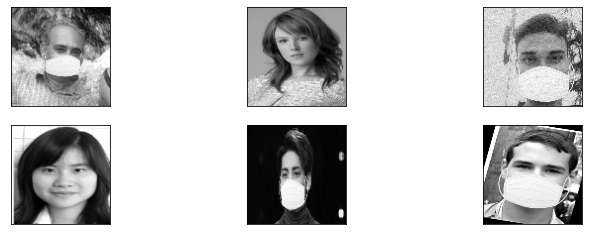

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = np.squeeze(data[np.random.randint(0, data.shape[0])])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

# Building the Model

In [12]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compile the model

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training the model

In [14]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=20,
  callbacks=[checkpoint],
  validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 8s 36ms/step - loss: 0.7184 - accuracy: 0.5007 - val_loss: 0.6196 - val_accuracy: 0.7258
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 1s 25ms/step - loss: 0.5963 - accuracy: 0.6846 - val_loss: 0.4728 - val_accuracy: 0.8105
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 1s 25ms/step - loss: 0.4320 - accuracy: 0.8152 - val_loss: 0.3246 - val_accuracy: 0.8750
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 1s 25ms/step - loss: 0.3157 - accuracy: 0.8569 - val_loss: 0.2552 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 1s 25ms/step - loss: 0.2286 - accuracy: 0.9069 - val_loss: 0.1981 - val_accuracy: 0.9315
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch

# Evaluating the model

In [15]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 22ms/step - loss: 0.2093 - accuracy: 0.9348
[0.2092990130186081, 0.9347826242446899]


# Detect the Face Masks using the HaarCascade_frontalface_default.xml file in real time

As colab can't access local camera, will upload a recorded video to see the results.

In [16]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [48]:
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = load_model('/content/model-001.model')
face_clsfr=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

source=cv2.VideoCapture('/content/WIN_20210221_11_11_57_Pro.mp4')

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}
count = 0

while source.isOpened():
  ret,img=source.read()
  key=cv2.waitKey(1)
  if ret:
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(img,1.3,5)  

    for x,y,w,h in faces:
    
      face_img=gray[y:y+w,x:x+w]
      resized=cv2.resize(face_img,(100,100))
      normalized=resized/255.0
      reshaped=np.reshape(normalized,(1,100,100,1))
      result=model.predict(reshaped)

      label=np.argmax(result,axis=1)[0]
      #print(label)
      
      cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
      cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
      cv2.putText(img, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
      count = count+1
      if count%26 == 0:
        cv2_imshow(img)
  else:
    break    
    
  if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

Output hidden; open in https://colab.research.google.com to view.